# Data Preparation and Cleaning

This notebook showcases a few general methods to clean up your training data. The better the data, the more accurate the model. While "good data" is highly subjective to your application, but some general guidelines could include
- keeping your data formatting consistent. (binary boolean values, integers vs. floats, case-sensitivity)
- Clearing duplicates
- Filtering non applicable outliers
- etc.
***

In [3]:
##### Imports packages

import pandas as pd
import numpy as np

In [4]:
##### Imports dataset from partially cleaned csv file
# The pandas dataframe is easier to work with than a pure csv file. 

dataset = pd.read_csv("combined_data.csv")
dataset

,R,G,B,colour
0,81.0,42.0,173.0,PURPLE
1,222.0,9.0,73.0,RED
2,59.0,188.0,227.0,BLUE
3,14.0,158.0,29.0,GREEN
4,222.0,222.0,82.0,YELLOW
...,...,...,...,...
504,139.0,140.0,122.0,Grey
505,189.0,236.0,182.0,Light Green
506,198.0,166.0,100.0,Brown
507,59.0,131.0,189.0,Blue


In [5]:
##### Check number of occurences of each color in dataset
# This helps us identify how we want to start cleaning our dataset

dataset["colour"].value_counts()

colour
green                  17
BLUE                   15
blue                   15
Green                  13
PURPLE                 12
                       ..
pastel green            1
Aphroditean Fuchsia     1
Gorgonzola Blue         1
Whiskey Sour            1
Light Green             1
Name: count, Length: 256, dtype: int64

We first notice colors are double counted due to case discrepancies. Let's standardize our color names by making them all lowercase 

In [6]:
##### Case Folding -> to lowercase
# We select the 'colour' column and apply Panda's lower() method.
# This serves to standardize the format of our color names.

dataset['colour'] = dataset['colour'].str.lower()
dataset

,R,G,B,colour
0,81.0,42.0,173.0,purple
1,222.0,9.0,73.0,red
2,59.0,188.0,227.0,blue
3,14.0,158.0,29.0,green
4,222.0,222.0,82.0,yellow
...,...,...,...,...
504,139.0,140.0,122.0,grey
505,189.0,236.0,182.0,light green
506,198.0,166.0,100.0,brown
507,59.0,131.0,189.0,blue


***
We have an issue: some of our data is in **floating point RGB (0-1)** notation and not **integer RGB (1-255)**! Although these entries are in the wrong format, we don't want to simply discard them. As you may know, the former is a *normalized* RGB color-vector, which can be converted by multiplying each floating point value by 255 to get them to scale.

It's nice to pick transformations independent of the rows, these are magic numbers. As an exercise, try to implement a cleaning algorithm that converts normalized RGB values without knowing the rows.


In [7]:
##### Denormalize the RGB value across the selected rows
# This keeps our RGB values consistent throughout the whole dataset.

dataset.loc[221:261, ['R','G','B'] ] = dataset[221:261][ ['R','G','B'] ].apply(lambda x: x * 255)

In [8]:
dataset[221:261]

,R,G,B,colour
221,153.000,151.980,80.070,moss green
222,171.105,109.905,60.945,browny orange
223,255.000,186.915,33.915,mustard yellow
224,95.115,255.000,33.915,flashy green
225,32.895,83.895,13.005,lime green
226,58.905,82.110,49.980,navy
227,173.910,225.930,236.895,light blue
228,204.000,176.970,236.895,light purple
229,235.110,4.080,186.915,flashy pink
230,54.060,31.110,48.960,dark purple


***
We want to decrease the number of possible classes.
-> Notice the pattern in our dataset: composite colors often have a basic color as its second word (i.e Cheeto ***Orange***).
We can therefore truncate every composite color name to *only* the last one.

In [9]:
##### Keep last word of every color
# This simplifies the composite names
# We overwrite the column colour with the corrected entries

dataset.loc[:, ['colour']] = dataset.loc[:, ['colour']].apply(lambda name: name.str.split().str[-1], axis=1)

***
Let's take a look at the amount of unique colors now!

In [10]:
dataset["colour"].value_counts()

colour
green        75
blue         73
pink         36
purple       35
red          35
             ..
drab          1
peru          1
sunflower     1
whip          1
gurgundy      1
Name: count, Length: 92, dtype: int64

92 unique colours, but we can do better. It could be beneficial to remove all the colors with only a count of one... because some of these singletons are quite meaningless.

We can select only the colors that appear more than **7** times to keep only the 'recognizable' colors.

In [11]:
##### Get the Pandas Series of every color in our database
# We can work with the series to select our desired colors

value_counts = dataset['colour'].value_counts()

In [12]:
##### Keep every color in the Series that appears >7 times
# Now we only have our desired colours in the Series

valid_values = value_counts[value_counts >7].index

In [13]:
##### Get the newly filtered dataset
# we obtain it by keeping the entries that appear both in the full the list/series of valid colors.

filtered_dataset = dataset[dataset['colour'].isin(valid_values)]

In [14]:
print(filtered_dataset.to_string())

           R        G        B     colour
0     81.000   42.000  173.000     purple
1    222.000    9.000   73.000        red
2     59.000  188.000  227.000       blue
3     14.000  158.000   29.000      green
4    222.000  222.000   82.000     yellow
5    222.000  154.000   82.000     orange
6    240.000  137.000   26.000     orange
7     54.000  181.000  126.000      green
8     16.000  115.000  130.000       blue
9     96.000  126.000  181.000       blue
10   222.000  160.000  194.000       pink
11   205.000  143.000  219.000     purple
12   143.000  219.000  177.000      green
13   143.000  176.000  219.000       blue
14   215.000  219.000  143.000     yellow
15   135.000  206.000  235.000       blue
16   255.000   97.000   56.000     orange
17   255.000   99.000   71.000        red
18   120.000   81.000  169.000     purple
19   255.000   20.000  147.000       pink
20   199.000   77.000  222.000       pink
21   222.000  200.000   77.000     yellow
22   133.000  266.000  233.000    

And here we have our fully cleaned dataset!

To summarize, we:
- made the color names lowercase
- only kept the relevant part of compound names
- filtered unpopular outliers
- standardized our RGB values
- etc.

However, the accuracy of our model isn't all that good. This is because we made lots of oversimplifications in our data.



***
>
# Exercise: training a KNN classififer for color names

Input: R, G, B,
Output (prediciton): color name

- do a train test split on the diltered_dataset
- train a KNN (choose whatever you want to start with)
- make predictions on the test set
- compute accuracy score
- repeat for different K if necessary

In [35]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
filtered_dataset = filtered_dataset.drop(index=261)

In [17]:
X_train, X_test, y_train, y_test = \
    train_test_split(filtered_dataset[['R','G','B']], filtered_dataset['colour'], test_size=0.2)

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)

In [19]:
knn.fit(X_train, y_train)

# Remove NaN

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_predicted = knn.predict(X_test)

In [21]:
# KNN accuracy score
accuracy_score(y_test, y_predicted)

0.6582278481012658

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt = DecisionTreeClassifier(max_depth=7)

In [24]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [25]:
# Decision Tree accuracy score
y_predicted = dt.predict(X_test)
accuracy_score(y_test, y_predicted)

0.6329113924050633

In [26]:
from sklearn import tree


[Text(0.5528846153846154, 0.9375, 'x[0] <= 175.5\ngini = 0.888\nsamples = 314\nvalue = [7.0, 55.0, 20.0, 60.0, 20.0, 20.0, 29.0, 27.0, 27.0\n5.0, 10.0, 7.0, 27.0]'),
 Text(0.32967032967032966, 0.8125, 'x[2] <= 138.5\ngini = 0.812\nsamples = 194\nvalue = [7.0, 54.0, 15.0, 55.0, 17.0, 1.0, 1.0, 20.0, 9.0\n5.0, 9.0, 0.0, 1.0]'),
 Text(0.4412774725274725, 0.875, 'True  '),
 Text(0.18681318681318682, 0.6875, 'x[1] <= 141.5\ngini = 0.788\nsamples = 135\nvalue = [7, 13, 15, 54, 13, 1, 1, 15, 9, 1, 5, 0, 1]'),
 Text(0.17582417582417584, 0.5625, 'x[0] <= 69.5\ngini = 0.86\nsamples = 106\nvalue = [7, 13, 15, 25, 13, 1, 1, 15, 9, 1, 5, 0, 1]'),
 Text(0.08791208791208792, 0.4375, 'x[1] <= 58.952\ngini = 0.717\nsamples = 54\nvalue = [7, 13, 1, 24, 1, 0, 0, 5, 1, 1, 1, 0, 0]'),
 Text(0.04395604395604396, 0.3125, 'x[2] <= 33.5\ngini = 0.783\nsamples = 23\nvalue = [6, 7, 1, 1, 1, 0, 0, 5, 1, 0, 1, 0, 0]'),
 Text(0.02197802197802198, 0.1875, 'x[1] <= 34.5\ngini = 0.278\nsamples = 6\nvalue = [5, 0, 0, 1

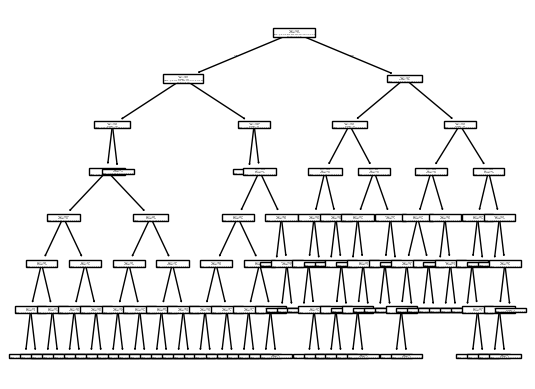

In [27]:
tree.plot_tree(dt)


# Wednesday - Day 3: Unsupervised learning and model validation

In [29]:
X = filtered_dataset[['R', 'G', 'B']] #make a new matrix with just a few columns 
y = filtered_dataset['colour']  #one dimensional so use colour  

In [36]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(n_estimators = 100) # passing through the parameterhow many trees to use
# Optional: can test it out with different depths
# Setting max_depth limits the growth of each tree, helping to prevent overfitting
rf = RandomForestClassifier(n_estimators = 500, max_depth=5) 

In [32]:
# Fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500)

In [33]:
# Use the trained model to make predictions on the test data
y_predicted = dt.predict(X_test)

In [34]:
# Measure how well the model performs on the test data
accuracy_score(y_test, y_predicted)

0.6329113924050633